In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")

In [2]:
data_directory = "/global/homes/r/rmilton/m3246/rmilton/H1Unfold/jet_data/"
file_name = "kt_Rapgap_jets_closure.root"
with ur.open("{file}:reco_event".format(file=data_directory+file_name)) as event:
    event_info = event.arrays(["reco_Q2", "reco_y","reco_elec_phi", "reco_elec_eta", "reco_elec_pT", "weight", "step1_weights"])
    print("Number of events:",event.num_entries)

Number of events: 777403


In [3]:
data_directory = "/global/homes/r/rmilton/m3246/rmilton/H1Unfold/jet_data/"
file_name = "kt_Djangoh_jets_closure.root"
with ur.open("{file}:reco_event".format(file=data_directory+file_name)) as event:
    data_event_info = event.arrays(["reco_Q2", "reco_y", "reco_elec_pT","reco_elec_eta","reco_elec_phi", "weight"])
    print("Number of events:",event.num_entries)

Number of events: 767565


1.0065778302887949


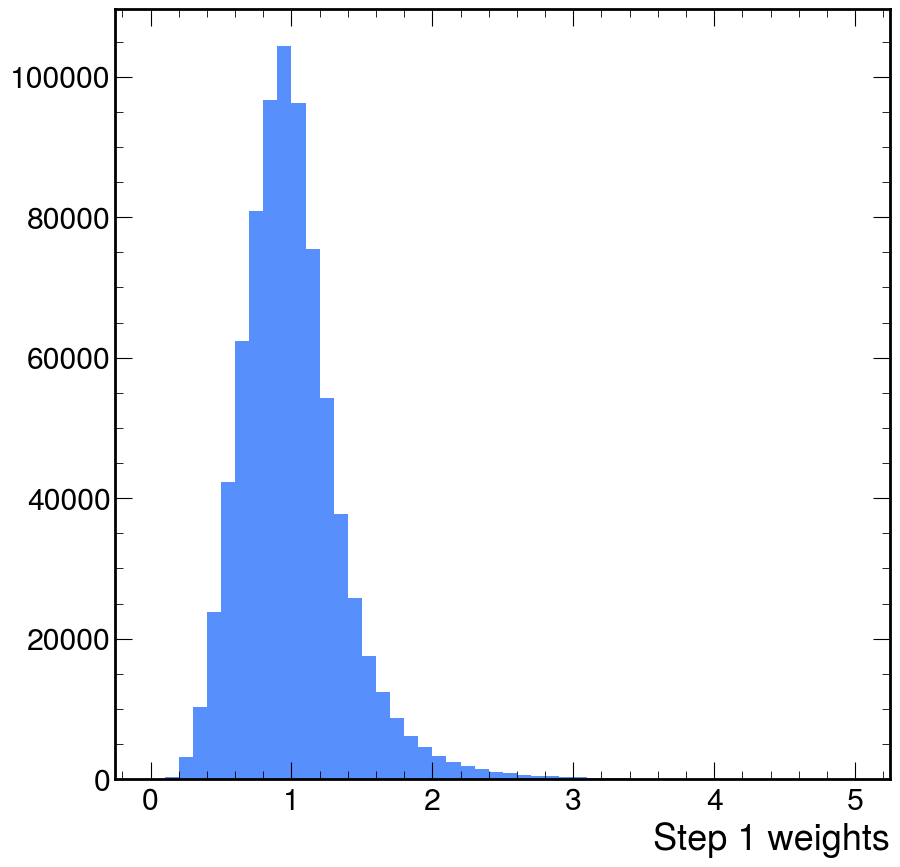

In [4]:
plt.hist(event_info["step1_weights"], bins=50, range=(0,5))
plt.xlabel("Step 1 weights")
print(np.mean(event_info["step1_weights"]))

[6.92086917e-01 9.15695242e-01 9.84618164e-01 9.40408610e-01
 8.54986539e-01 7.46151244e-01 6.54806886e-01 5.72704235e-01
 5.07402328e-01 4.42622908e-01 3.77799255e-01 3.26479406e-01
 2.77335991e-01 2.38162405e-01 2.01600236e-01 1.72599831e-01
 1.50692784e-01 1.33183728e-01 1.17668603e-01 1.03036136e-01
 9.07745359e-02 7.74013301e-02 6.78028336e-02 5.73368930e-02
 4.80546661e-02 4.08227805e-02 3.48364367e-02 2.93296661e-02
 2.45441228e-02 1.91360739e-02 1.70494733e-02 1.35766021e-02
 1.20565574e-02 1.09017679e-02 9.92684978e-03 8.18225514e-03
 6.71286224e-03 4.97728261e-03 4.24269455e-03 2.85358048e-03
 2.31166735e-03 2.06197616e-03 1.59760317e-03 1.20119560e-03
 7.57798331e-04 5.78623881e-04 4.05211559e-04 2.67093747e-04
 1.26533057e-04 1.31719476e-04]


Text(1, 0, 'log($Q^2$)')

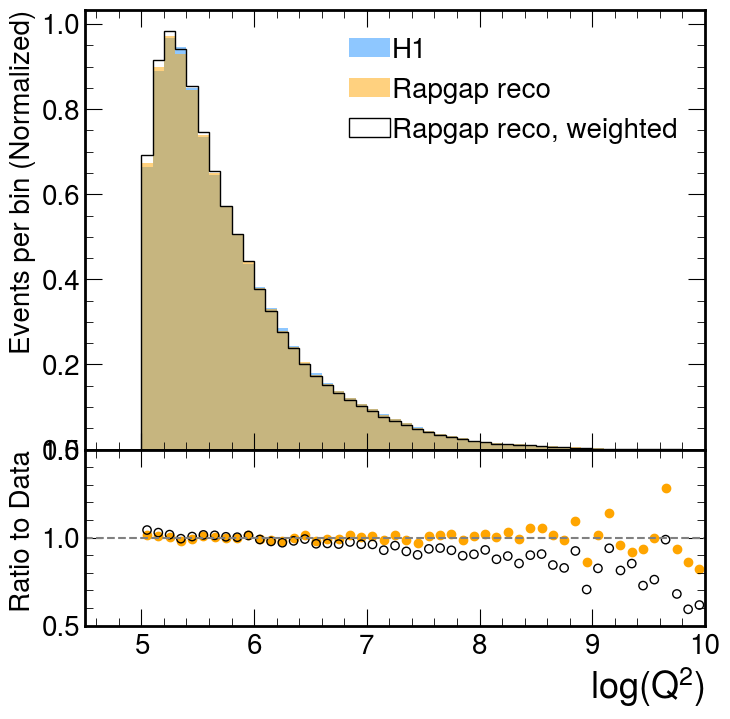

In [5]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = 5, 10
data_entries, data_bins, _ = axs[0].hist(np.log(data_event_info["reco_Q2"]), weights=data_event_info["weight"], bins=50, histtype='stepfilled', label="H1", density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(np.log(event_info["reco_Q2"]), weights=event_info["weight"], bins=50, histtype='stepfilled', label="Rapgap reco", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(np.log(event_info["reco_Q2"]), weights=event_info["weight"]*event_info["step1_weights"], bins=50, histtype='step', label="Rapgap reco, weighted", density=True, color='black', range=(xlow, xhigh))
print(unfolded_entries)
data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(4.5, xhigh)
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)

axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.5, 1.5)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, 4.5, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("log($Q^2$)")


Text(1, 0, 'y')

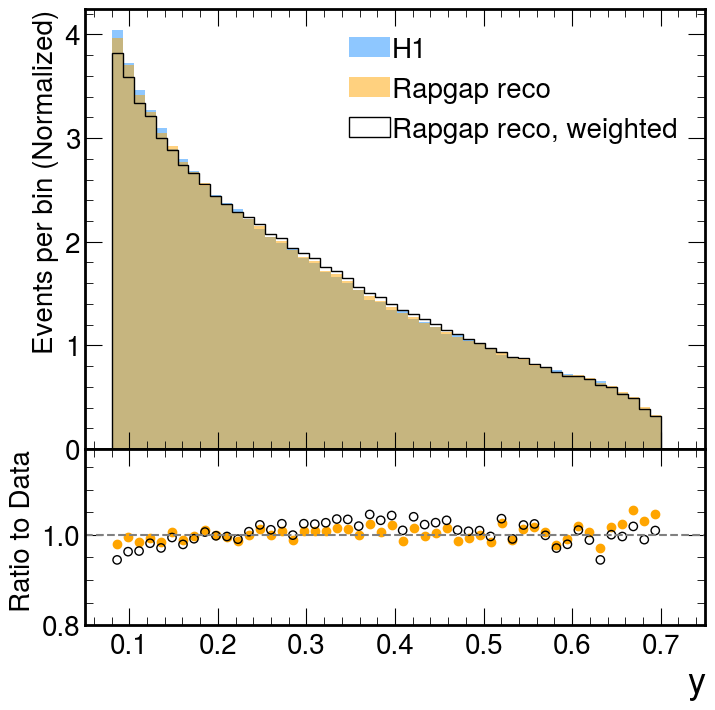

In [6]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = .08, .7
data_entries, data_bins, _ = axs[0].hist(data_event_info["reco_y"], weights=data_event_info["weight"], bins=50, histtype='stepfilled', label="H1", density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["reco_y"], weights=event_info["weight"], bins=50, histtype='stepfilled', label="Rapgap reco", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["reco_y"], weights=event_info["weight"]*event_info["step1_weights"], bins=50, histtype='step', label="Rapgap reco, weighted", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(.05, .75)
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, .05, .75, color='grey', linestyle='dashed' )
plt.xlabel("y")


Text(1, 0, '$e_{pT}/Q$')

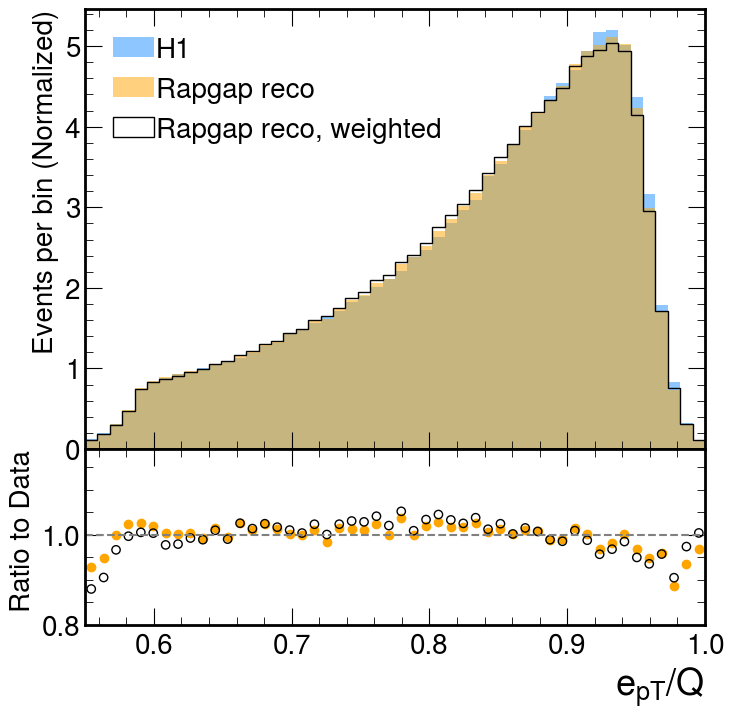

In [14]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = .55, 1
data_entries, data_bins, _ = axs[0].hist(data_event_info["reco_elec_pT"]/np.sqrt(data_event_info["reco_Q2"]), weights=data_event_info["weight"], bins=50, histtype='stepfilled', label="H1", density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["reco_elec_pT"]/np.sqrt(event_info["reco_Q2"]), weights=event_info["weight"], bins=50, histtype='stepfilled', label="Rapgap reco", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["reco_elec_pT"]/np.sqrt(event_info["reco_Q2"]), weights=event_info["weight"]*event_info["step1_weights"], bins=50, histtype='step', label="Rapgap reco, weighted", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].legend(loc='upper left', handletextpad=0.05, fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$e_{pT}/Q$")


Text(1, 0, '$e_{\\eta}$')

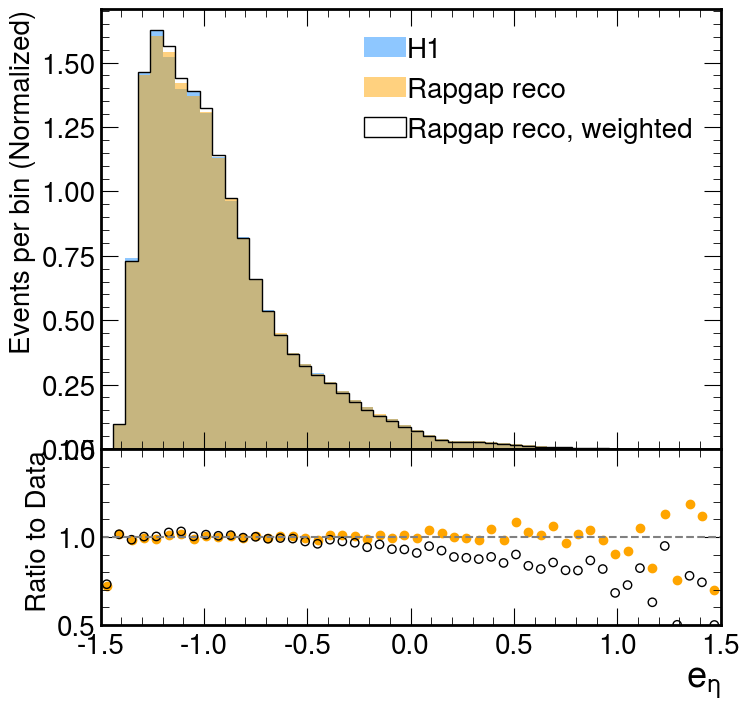

In [12]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = -1.5, 1.5
data_entries, data_bins, _ = axs[0].hist(data_event_info["reco_elec_eta"], weights=data_event_info["weight"], bins=50, histtype='stepfilled', label="H1", density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["reco_elec_eta"], weights=event_info["weight"], bins=50, histtype='stepfilled', label="Rapgap reco", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["reco_elec_eta"], weights=event_info["weight"]*event_info["step1_weights"], bins=50, histtype='step', label="Rapgap reco, weighted", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.5, 1.5)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$e_{\eta}$")
